In [1]:
#Installing Packages
using Pkg
Pkg.add("DynamicalSystems")
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
#Importing Libraries
using DynamicalSystems, DifferentialEquations, Plots

# The Rikitake Differential Equations
The Rikitake dynamical system is a model which attempts to explain the irregular polarity switching of the geomagnetic field. The system exhibits Lorenz-type chaos and orbiting around two unstable fixed points. We employ techniques in the vein of the Lyapunov function method in an attempt to characterize the dynamics on the attractor of the system.

$$
\begin{aligned}
\dot{x} & = - vx + zy \\
\dot{y} & = - vy + (z - a)x\\
\dot{z} & = 1 - xy
\end{aligned}
$$

In [22]:
#Defining the Rikitake Differential Equations
function rikitake!(du,u,p,t)
    x,y,z = u
    a,v = p
    
    du[1] = -v*x + z*y
    du[2] = -v*y + (z-a)*x
    du[3] = 1 - x*y
    
    return nothing
end

rikitake! (generic function with 1 method)

In [24]:
initial = [1.0,1.0,1.0] #Initial Conditions
parameters = [5,2.1] #value of a and v
time_span = (0.0,100.0) #Time span of the equations

prob = ODEProblem(rikitake!,initial,time_span,parameters) #Defining the ODE
sol = solve(prob) #Solving the ODE

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 343-element Vector{Float64}:
   0.0
   0.06193182297645054
   0.15338092428439914
   0.26059694151154295
   0.38507497486106895
   0.5369048541079036
   0.7067265046018528
   0.8873430258579046
   1.0666736370681653
   1.254475664502026
   1.4683121729306177
   1.693167221682271
   1.8916298106177
   ⋮
  96.51964513581399
  96.78936186688553
  97.09573060353797
  97.44453623214251
  97.815160125191
  98.18124936387174
  98.57021025321191
  98.92883065975684
  99.21097197394855
  99.47441555472858
  99.75820974748747
 100.0
u: 343-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0]
 [0.9257533770963816, 0.6545913208705023, 1.0127365001716746]
 [0.8017196249113028, 0.25580473481068394, 1.0686428311496243]
 [0.6481413584193024, -0.06504015910325572, 1.1689353852842572]
 [0.4731098673150492, -0.279321864064869, 1.3058790569012888]
 [0.2815843269103164, -0.

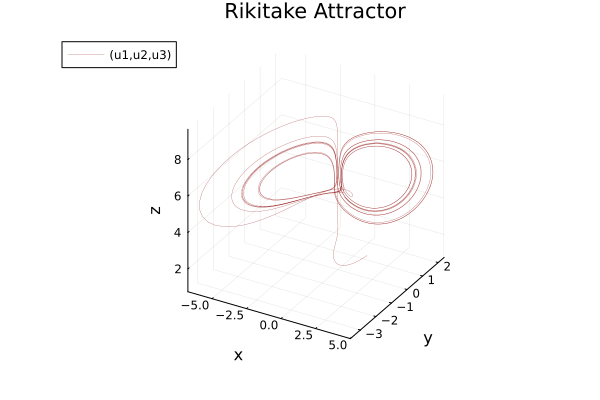

In [25]:
#Plotting the solution of ODE
plot(sol, idxs=(1,2,3), xlabel="x", ylabel="y", zlabel="z", title="Rikitake Attractor", lw=0.2, color=:redsblues)